In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read UC Irvine Machine Learning Repository’s Wisconsin Breast Cancer Diagnostic dataset is
df = pd.read_csv("data.csv")

# View a sample of the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data pre-processing

In [3]:
# Dropping the arbitrary ID column and Unnamed column as they have no relevance to the expirement
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [4]:
# Check for missing data
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No missing data

In [5]:
# Convert diagnosis feature data into binary data using one-hot encoding
df = pd.get_dummies(data=df, columns=['diagnosis'], drop_first=True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


In [6]:
# Identify class imbalance
df['diagnosis_M'].value_counts()

diagnosis_M
False    357
True     212
Name: count, dtype: int64

In [7]:
from sklearn.utils import resample

# Upsample the minority class to match the majority class
# "1" is the minority class
majority_class = df[df['diagnosis_M'] == 0]
minority_class = df[df['diagnosis_M'] == 1]


minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the majority class with the upsampled minority class
df = pd.concat([majority_class, minority_upsampled])

df["diagnosis_M"] = df["diagnosis_M"].replace({True: 1, False: 0})


In [8]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,16.740,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.060180,0.1896,0.05656,...,29.02,133.50,1229.0,0.15630,0.38350,0.54090,0.18130,0.4863,0.08633,1
414,15.130,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.027390,0.1852,0.05294,...,36.91,110.10,931.4,0.11480,0.09866,0.15470,0.06575,0.3233,0.06165,1
533,20.470,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.101500,0.2166,0.05419,...,27.15,152.00,1645.0,0.10970,0.25340,0.30920,0.16130,0.3220,0.06386,1
460,17.080,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.064310,0.1793,0.06281,...,34.49,152.10,1648.0,0.16000,0.24440,0.26390,0.15550,0.3010,0.09060,1


The final dataset contains 714 instances. This helps prevent the models from blindly predicting the majority class.

In [9]:
# A MinMax scaler is also employed to bring the features of the dataset to a uniform range between 0 and 1

df = (df - df.min()) / (df.max() - df.min())
df



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
19,0.310426,0.157254,0.301776,0.179343,0.407692,0.212006,0.156139,0.237624,0.490196,0.162174,...,0.206033,0.245480,0.129276,0.480948,0.164736,0.190895,0.442612,0.278336,0.148779,0.0
20,0.288655,0.202908,0.289130,0.159703,0.495351,0.368536,0.107029,0.154573,0.538919,0.382266,...,0.241036,0.227501,0.109443,0.396421,0.274882,0.150958,0.250275,0.319141,0.227111,0.0
21,0.119409,0.092323,0.114367,0.055313,0.449309,0.155948,0.069260,0.103181,0.448604,0.402064,...,0.103586,0.073310,0.031877,0.404345,0.096100,0.070823,0.213986,0.174453,0.192353,0.0
37,0.286289,0.294555,0.268261,0.161315,0.335831,0.062598,0.060028,0.145278,0.241830,0.182603,...,0.307057,0.169580,0.088650,0.170640,0.020755,0.038602,0.172268,0.083185,0.056375,0.0
46,0.057504,0.241123,0.054730,0.024772,0.301255,0.137148,0.037207,0.029409,0.421272,0.317397,...,0.282869,0.034115,0.014009,0.386515,0.119052,0.054952,0.088110,0.303568,0.161495,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,0.461877,0.401759,0.458227,0.307953,0.392435,0.391138,0.315839,0.299105,0.496732,0.139006,...,0.483779,0.413815,0.256538,0.562174,0.391177,0.432029,0.623024,0.650108,0.265259,1.0
414,0.385678,0.679743,0.365697,0.244327,0.275977,0.091329,0.109794,0.136133,0.470588,0.062763,...,0.708310,0.297276,0.183396,0.288120,0.078376,0.123562,0.225945,0.328800,0.056036,1.0
533,0.638412,0.370646,0.628222,0.490138,0.351449,0.383261,0.356842,0.504473,0.657160,0.089090,...,0.430563,0.505951,0.358779,0.254441,0.248306,0.246965,0.554296,0.326237,0.074771,1.0
460,0.477969,0.589787,0.465828,0.333998,0.418435,0.313746,0.235942,0.319632,0.435532,0.270640,...,0.639442,0.506450,0.359516,0.586608,0.238423,0.210783,0.534364,0.284841,0.301458,1.0


In [10]:
# Split data into x,y where x has the features and y has the target
x = df.drop(['diagnosis_M'], axis=1)
y = df['diagnosis_M']

In [11]:
# Split the dataset into a training set (80%) and a testing set (20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

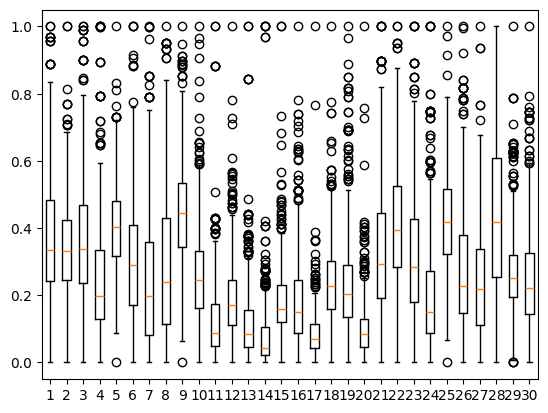

In [12]:
plt.boxplot(x)
plt.show()

As there are not many outliers in the data, the 20% test set is sufficient to evaluate the final models objectively.

<Axes: >

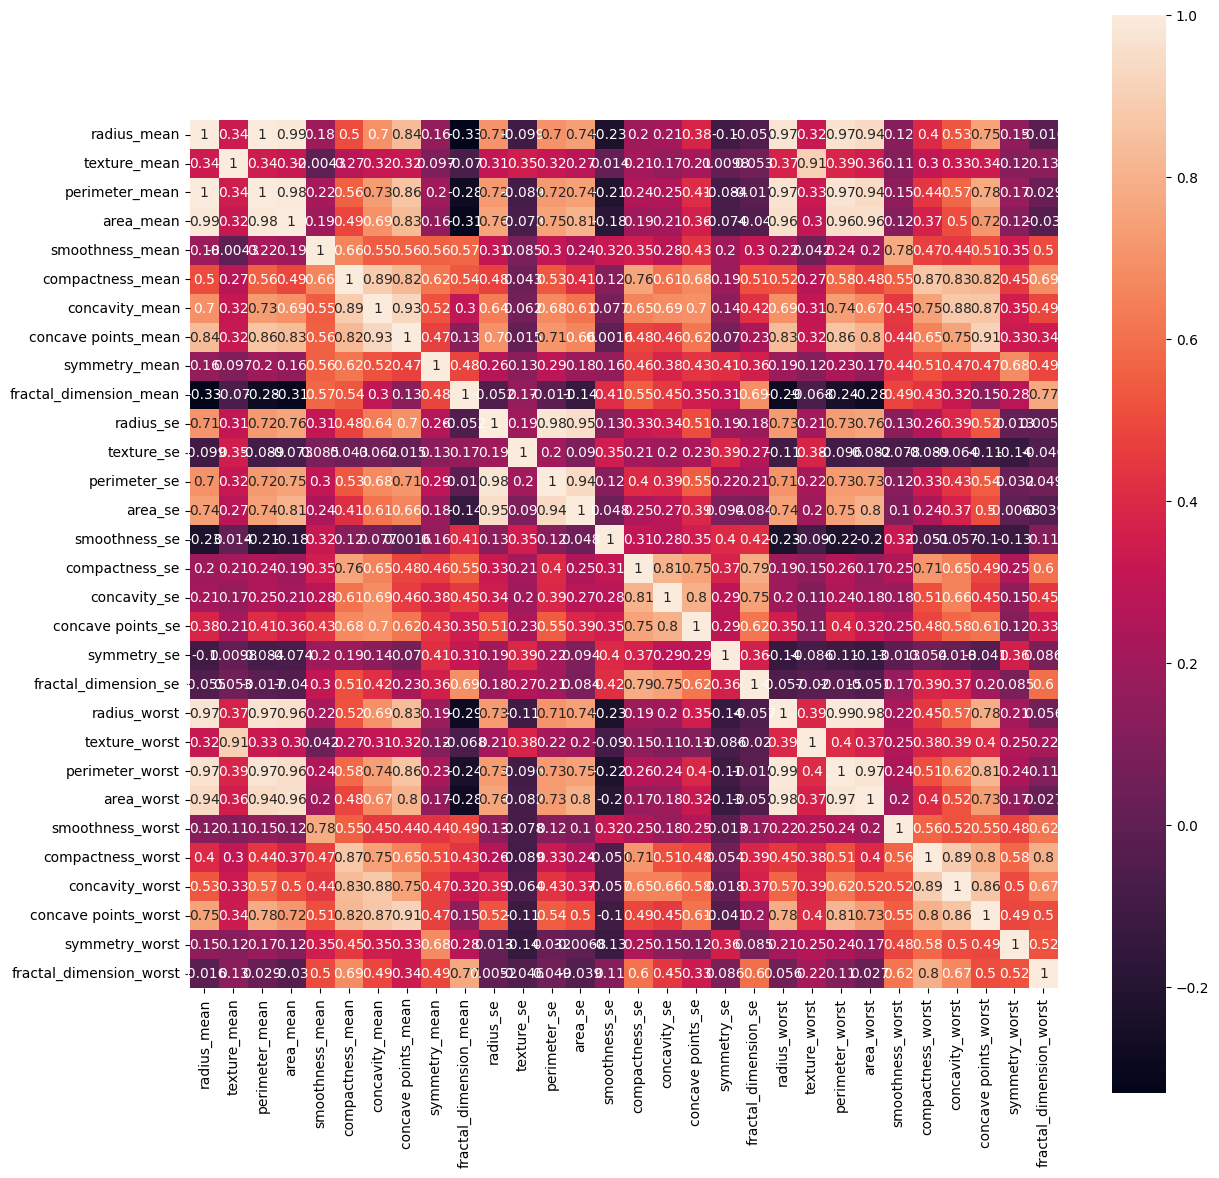

In [14]:
import seaborn as sns
plt.figure(figsize=(14,14))
sns.heatmap(x_train.corr(), vmax=1, square=True, annot=True)

In [15]:
# View correlation matrix for better digits visibility than the heatmap
corr_matrix = x_train.corr()
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.335688,0.997862,0.985594,0.184101,0.504869,0.695904,0.837800,0.162414,-0.331088,...,0.969814,0.322175,0.967183,0.941524,0.124299,0.399391,0.532533,0.751888,0.149904,-0.016392
texture_mean,0.335688,1.000000,0.343958,0.320201,-0.004328,0.271256,0.316275,0.320423,0.096887,-0.069900,...,0.374611,0.906053,0.385928,0.355239,0.113346,0.303136,0.332385,0.339058,0.116894,0.134262
perimeter_mean,0.997862,0.343958,1.000000,0.984423,0.218688,0.555518,0.734698,0.864783,0.197261,-0.282849,...,0.968676,0.328417,0.971751,0.940424,0.151613,0.443360,0.570649,0.778021,0.169910,0.028503
area_mean,0.985594,0.320201,0.984423,1.000000,0.188937,0.486713,0.694641,0.829069,0.156124,-0.307832,...,0.960057,0.300466,0.957896,0.960620,0.118511,0.366749,0.504706,0.716599,0.118436,-0.030496
smoothness_mean,0.184101,-0.004328,0.218688,0.188937,1.000000,0.662673,0.546776,0.555319,0.558021,0.573389,...,0.215538,0.041687,0.241166,0.202789,0.780559,0.469042,0.444049,0.506886,0.345380,0.496887
compactness_mean,0.504869,0.271256,0.555518,0.486713,0.662673,1.000000,0.888098,0.824998,0.618034,0.536968,...,0.520801,0.269736,0.581292,0.482249,0.554500,0.871450,0.832971,0.820552,0.450314,0.687868
concavity_mean,0.695904,0.316275,0.734698,0.694641,0.546776,0.888098,1.000000,0.927671,0.518847,0.300446,...,0.693364,0.308026,0.739335,0.670271,0.446540,0.747312,0.880141,0.866803,0.354996,0.487896
concave points_mean,0.837800,0.320423,0.864783,0.829069,0.555319,0.824998,0.927671,1.000000,0.471334,0.127111,...,0.834082,0.317328,0.861875,0.803098,0.437521,0.654958,0.754849,0.909196,0.332506,0.338494
symmetry_mean,0.162414,0.096887,0.197261,0.156124,0.558021,0.618034,0.518847,0.471334,1.000000,0.480302,...,0.187964,0.121106,0.228157,0.167104,0.438054,0.506899,0.471581,0.470807,0.680417,0.485378
fractal_dimension_mean,-0.331088,-0.069900,-0.282849,-0.307832,0.573389,0.536968,0.300446,0.127111,0.480302,1.000000,...,-0.287371,-0.068418,-0.238277,-0.276034,0.485042,0.432152,0.321699,0.145879,0.275448,0.771749


In [16]:
# Find values > 0.8
corr_matrix[corr_matrix > 0.8]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,NaN,0.997862,0.985594,NaN,NaN,NaN,0.837800,NaN,NaN,...,0.969814,NaN,0.967183,0.941524,NaN,NaN,NaN,NaN,NaN,NaN
texture_mean,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.906053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,0.997862,NaN,1.000000,0.984423,NaN,NaN,NaN,0.864783,NaN,NaN,...,0.968676,NaN,0.971751,0.940424,NaN,NaN,NaN,NaN,NaN,NaN
area_mean,0.985594,NaN,0.984423,1.000000,NaN,NaN,NaN,0.829069,NaN,NaN,...,0.960057,NaN,0.957896,0.960620,NaN,NaN,NaN,NaN,NaN,NaN
smoothness_mean,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,1.000000,0.888098,0.824998,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.871450,0.832971,0.820552,NaN,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,0.888098,1.000000,0.927671,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.880141,0.866803,NaN,NaN
concave points_mean,0.837800,NaN,0.864783,0.829069,NaN,0.824998,0.927671,1.000000,NaN,NaN,...,0.834082,NaN,0.861875,0.803098,NaN,NaN,NaN,0.909196,NaN,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For pairs of features having a correlation coefficient higher than 0.8, one of the features is dropped to avoid multicollinearity. This process results in 14 features being removed and 16 features remaining.

In [17]:
# Initial dataset that contains 16 features
x_train_init = x_train[['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
                        'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
                        'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
                        'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']]

x_test_init = x_test[['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
                      'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
                      'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
                      'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']]

#### Further Feature Selection

In [18]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

# Choose an external estimator (Extra Trees Classifier)
estimator = ExtraTreesClassifier(n_estimators=100, random_state=1)

# Perform Recursive Feature Elimination
rfe = RFE(estimator, n_features_to_select=8)
rfe.fit_transform(x_train_init, y_train)

# Get the selected features and their rankings, lower rankings have better performance
# zip function combines features' names with their rankings
selected_features_with_rank = list(zip(x_train_init.columns, rfe.ranking_))

# Sort the features based on their rankings
sorted_features = sorted(selected_features_with_rank, key=lambda x: x[1])

# Extract the top features
top_features_RFE = [feature[0] for feature in sorted_features[:8]]

top_features_RFE

['texture_mean',
 'area_mean',
 'concavity_mean',
 'area_se',
 'smoothness_worst',
 'compactness_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [19]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(x_train_init, y_train)

# Feature selection based on model coefficients
sfm = SelectFromModel(model, threshold=-np.inf, max_features=8)
sfm.fit(x_train_init, y_train)

# Get selected features
selected_features_logistic = list(x_train_init.columns[sfm.get_support()])

selected_features_logistic

['texture_mean',
 'area_mean',
 'concavity_mean',
 'fractal_dimension_mean',
 'area_se',
 'smoothness_worst',
 'compactness_worst',
 'symmetry_worst']

In [20]:
# Univariate Selection

from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 8 features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=8)
selector.fit_transform(x_train_init, y_train)

# Get the indices of the selected features
selected_features_univariate = list(x_train_init.columns[selector.get_support()])

selected_features_univariate

['texture_mean',
 'area_mean',
 'smoothness_mean',
 'concavity_mean',
 'area_se',
 'smoothness_worst',
 'compactness_worst',
 'symmetry_worst']

In [21]:
# Extract features that at least two of the methods above ranked in the top eight

# Merge 3 lists
features = top_features_RFE + selected_features_logistic + selected_features_univariate

# Extract repeated features
repeated_features = [item for item in set(features) if features.count(item) > 1]

repeated_features

['texture_mean',
 'compactness_worst',
 'smoothness_worst',
 'area_mean',
 'area_se',
 'concavity_mean',
 'symmetry_worst']

Note that the further selected features here are only 7, while in the paper they are 8. This is mainly because data science algorithms include random initialization and random splitting. Differences in available system resources (CPU, GPU) or changes in the software environment (updates to libraries, changes in dependencies) can impact the results as well.

However, all 7 features selected here are selected in the paper as features of the minimal dataset. So the produced results are very similar to those in the paper so far.

In [23]:
# Minimal dataset that includes 7 features (8 features in the paper)
x_train_minimal = x_train[repeated_features]
x_test_minimal = x_test[repeated_features]

### Model Development

Five models are selected for a preliminary comparison- Random Forest (RF), Support Vector Machine (SVM), Decision Tree (DT), Multilayer Perceptron (MLP), and K-Nearest Neighbors (KNN). They are trained on the initial dataset with default parameters, and their results are compared. The models are 5-fold cross-validated using recall value as the scoring function.

In [24]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
import warnings

warnings.filterwarnings("ignore")

# Create models
random_forest = RandomForestClassifier()
svm_classifier = SVC()
decision_tree = DecisionTreeClassifier()
mlp_classifier = MLPClassifier() 
knn_classifier = KNeighborsClassifier()

classifiers = [
    ('Random Forest', random_forest),
    ('SVM', svm_classifier),
    ('Decision Tree', decision_tree),
    ('MLP', mlp_classifier),
    ('KNN', knn_classifier)
]

for name, clf in classifiers:
    clf.fit(x_train_init, y_train)
    y_pred = clf.predict(x_test_init)
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"{name} Recall Value: {recall}")

Random Forest Recall Value: 0.965034965034965
SVM Recall Value: 0.9300699300699301
Decision Tree Recall Value: 0.9300699300699301
MLP Recall Value: 0.9300699300699301
KNN Recall Value: 0.9090909090909091


The Random Forest model performs the best with a cross-validation recall score of 0.9720. Thus, the Random Forest model is selected as our primary model.

The four remaining models are trained using their default parameters on the initial and the minimal dataset. Random Forest’s hyperparameters are precisely tuned to maximize the primary model's performance.

In [25]:
# Apply an automated grid search over the possible hyperparameters

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2', 0.2, 0.5],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train_init, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 0.2, 'min_samples_split': 5, 'n_estimators': 200}


The previous cell is very likely to take hours or even days to run. We will have to take the hyperparameters as stated in the paper without checking the outcome of our Grid Search.

Since the data will be splitted into 5 folds, and then shuffled in each iteration, training and testing data shouldn't be separated into two different dataframes.

In [33]:
# Concatenate training and testing data
y = pd.concat([y_train, y_test])
x_init = pd.concat([x_train_init, x_test_init])
x_minimal = pd.concat([x_train_minimal, x_test_minimal])

In [37]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Ignore warnings
warnings.filterwarnings("ignore")

# A function that splits the data into 5-folds, shuffles them, and evaluates each model based on all 5 metrics
def compare_models(x, y):
    # Define models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=20, max_features=0.2,
                                           min_samples_split=5),
        'SVM': SVC(),
        'Decision Tree': DecisionTreeClassifier(),
        'MLP': MLPClassifier(),
        'KNN': KNeighborsClassifier()
    }

    # Define metrics
    metrics = {
        'Accuracy': make_scorer(accuracy_score),
        'Precision': make_scorer(precision_score),
        'Recall': make_scorer(recall_score),
        'F1 Score': make_scorer(f1_score),
        'ROC-AUC Score': make_scorer(roc_auc_score)
    }

    # Perform 5-fold cross-validation for each model and metric
    for model_name, model in models.items():
        print(f"\nResults for {model_name}:")
        for metric_name, metric in metrics.items():
            # Perform 5-fold cross-validation with shuffling
            kf = KFold(n_splits=5, shuffle=True, random_state=42)
            scores = cross_val_score(model, x, y, cv=kf, scoring=metric)

            # Print the average score for the current metric
            print(f"{metric_name}: {np.mean(scores)}")

Show results for the initial dataset:

In [38]:
compare_models(x_init, y)


Results for Random Forest:
Accuracy: 0.9789815817984833
Precision: 0.975060711197516
Recall: 0.9864444444444445
F1 Score: 0.9738374980376768
ROC-AUC Score: 0.9821523599803154

Results for SVM:
Accuracy: 0.967802619915296
Precision: 0.9805555555555555
Recall: 0.9550534417116296
F1 Score: 0.967442348263017
ROC-AUC Score: 0.9676836756565145

Results for Decision Tree:
Accuracy: 0.9691913720082734
Precision: 0.9648738152396493
Recall: 0.9886815920398011
F1 Score: 0.9792620831540351
ROC-AUC Score: 0.9763027328055017

Results for MLP:
Accuracy: 0.9705899734068748
Precision: 0.9671171171171171
Recall: 0.969453110036671
F1 Score: 0.9695425141356273
ROC-AUC Score: 0.9662463400047147

Results for KNN:
Accuracy: 0.9495715552053581
Precision: 0.9404976870035785
Recall: 0.9612849368182561
F1 Score: 0.9505922090229127
ROC-AUC Score: 0.9495255000008109


Do the same for the minimal dataset:

In [39]:
compare_models(x_minimal, y)


Results for Random Forest:
Accuracy: 0.9789914311041071
Precision: 0.9808558124012492
Recall: 0.9806424684091279
F1 Score: 0.9764537832366497
ROC-AUC Score: 0.9777698218432272

Results for SVM:
Accuracy: 0.9607702156997933
Precision: 0.9857545271629778
Recall: 0.9356809847476233
F1 Score: 0.9598451168306864
ROC-AUC Score: 0.9607947867676255

Results for Decision Tree:
Accuracy: 0.9706096720181229
Precision: 0.9633057881796165
Recall: 0.9832520729684908
F1 Score: 0.9741734402624646
ROC-AUC Score: 0.9704240156680266

Results for MLP:
Accuracy: 0.9510095538264552
Precision: 0.9553260229598258
Recall: 0.941236540303179
F1 Score: 0.9492238467084947
ROC-AUC Score: 0.951101392483794

Results for KNN:
Accuracy: 0.945346203092682
Precision: 0.939407974592281
Recall: 0.9550925653423026
F1 Score: 0.9464002041844342
ROC-AUC Score: 0.9450438497731094


Random Forest performed the best while KNN performed the worst.

In [30]:
# Plot ROC curve for random forest models

from sklearn.metrics import roc_curve, auc

def plot_ROC(x_train, x_test, y_train, y_test):
    classifier = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10, max_features='log2',
                                               min_samples_split=2)
    classifier.fit(x_train, y_train)

    # Obtain predicted probabilities for the positive class
    y_probabilities = classifier.predict_proba(x_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy')

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic')
    plt.show()

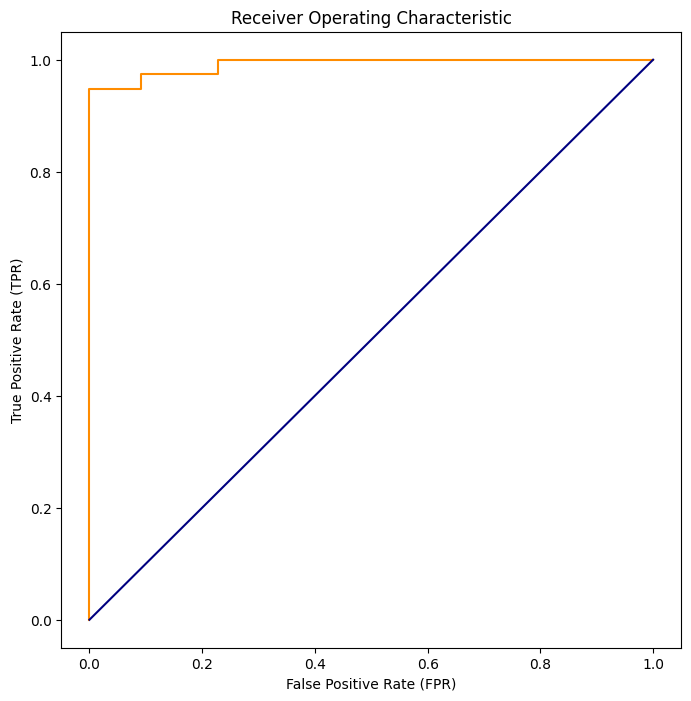

In [31]:
# Plot the ROC curve for initial dataset
plot_ROC(x_train_init, x_test_init, y_train, y_test)

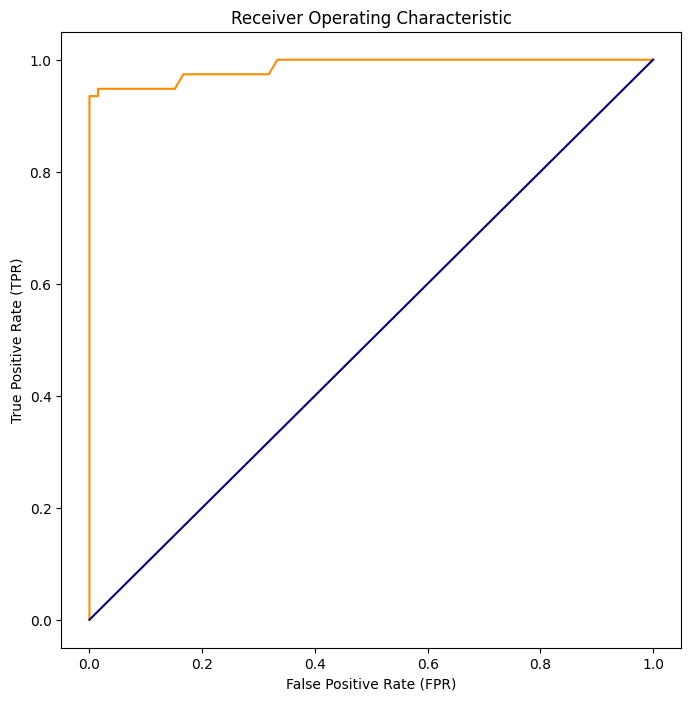

In [32]:
# Plot the ROC curve for minimal dataset
plot_ROC(x_train_minimal, x_test_minimal, y_train, y_test)

Note that with 9 features less used in the minimal dataset, the model still performs closely to the one that used the initial dataset.